<a href="https://colab.research.google.com/github/sanketgawali123/Bank-Marketing-Effectiveness-Prediction/blob/main/Copy_of_Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score,accuracy_score,recall_score
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from imblearn.combine import SMOTETomek
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

## Importing data:

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bank Marketing Effectiveness Prediction/bank-full.csv'
bank = pd.read_csv(path, sep=";")

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Initial Data Notes:

In [ ]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Last Data Notes:

In [ ]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
bank.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
bank.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

### Missing Values

In [ ]:
bank.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [ ]:
bank['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

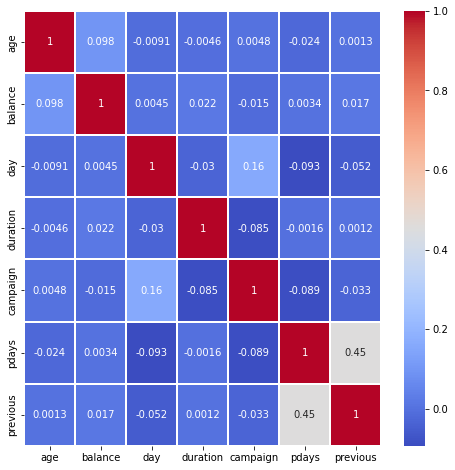

In [ ]:
#ploting heatmap
plt.figure(figsize = (8,8))
sns.heatmap(bank.corr(), cmap = 'coolwarm', annot = True, linewidth = 1, linecolor = 'white')

## Categorical Data

In [ ]:
categorical_variable = bank.select_dtypes(include='object')
categorical_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        45211 non-null  object
 1   marital    45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   housing    45211 non-null  object
 5   loan       45211 non-null  object
 6   contact    45211 non-null  object
 7   month      45211 non-null  object
 8   poutcome   45211 non-null  object
 9   y          45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [ ]:
#Checking categorical column value count
for i in categorical_variable.columns:
    print('********'*5)
    print("\n")
    print('column name :',i)
    print(bank[i].value_counts())

****************************************


column name : job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
****************************************


column name : marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
****************************************


column name : education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
****************************************


column name : default
no     44396
yes      815
Name: default, dtype: int64
****************************************


column name : housing
yes    25130
no     20081
Name: housing, dtype: int64
****************************************


column name : loan
no     37967
yes     7244
Name:

In [ ]:
from unicodedata import normalize
#Checking for categorical variable data in percentage
for i in categorical_variable.columns:
    print('********'*5)
    print("\n")
    print('column name : ',i)
    print(bank[i].value_counts(normalize = True) * 100)

****************************************


column name :  job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64
****************************************


column name :  marital
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64
****************************************


column name :  education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64
****************************************


column name :  default
no     98.197341
yes     1.802659
Name: default, dtype: float64
****************************************


column name :  housing
yes    55.583818
no     44.416182
Name

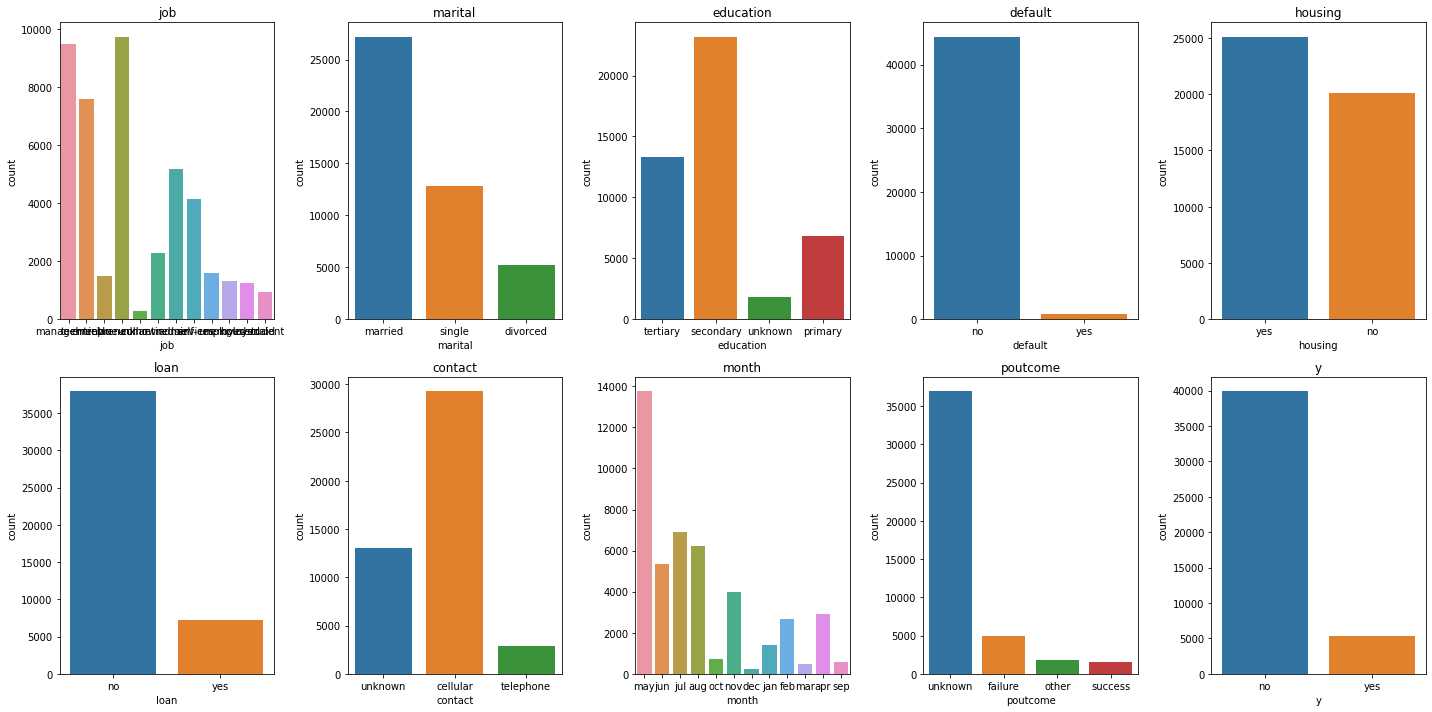

In [ ]:
#ploting categorical data in countplot
n=1
plt.figure(figsize=(20,10))
for i in categorical_variable:
    plt.subplot(2,5,n)
    n=n+1
    sns.countplot(data=bank,x=bank[i])
    plt.title(i)
    plt.tight_layout()    

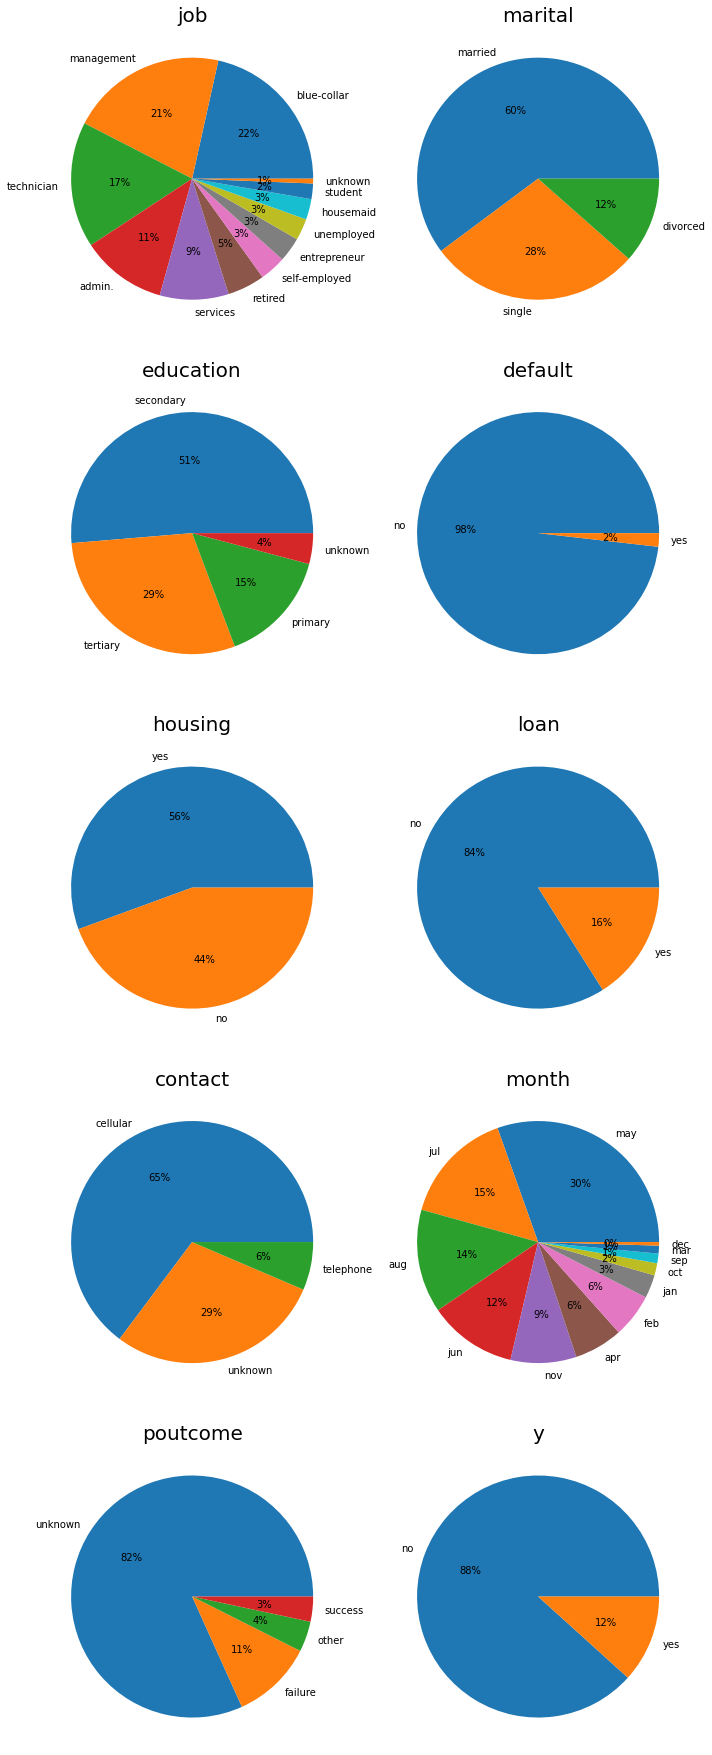

In [ ]:
# creating pieplot for all categorical feature
n = 1
plt.figure(figsize = (10,30))
for i in categorical_variable.columns:
    plt.subplot(6,2,n)
    n = n + 1
    plt.pie(bank[i].value_counts(), labels = bank[i].value_counts().keys().tolist(), autopct = '%.0f%%')
    plt.title(i, size = 20)
    plt.tight_layout()

## Numerical Data

In [ ]:
numerical_value = bank.select_dtypes(exclude='object')
numerical_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   day       45211 non-null  int64
 3   duration  45211 non-null  int64
 4   campaign  45211 non-null  int64
 5   pdays     45211 non-null  int64
 6   previous  45211 non-null  int64
dtypes: int64(7)
memory usage: 2.4 MB


In [ ]:
# checking nume column value count
for i in numerical_value.columns:
    print('********'*5)
    print("\n")
    print('column name : ',i)
    print(bank[i].value_counts())

****************************************


column name :  age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
****************************************


column name :  balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64
****************************************


column name :  day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64
****************************************


column name :  duration
124     188
90

In [ ]:
#Checking the numerical value data in persentage
for i in numerical_value.columns:
    print('********'*5)
    print("\n")
    print('column name : ', i)
    print(bank[i].value_counts(normalize = True) * 100)

****************************************


column name :  age
32    4.611710
31    4.414855
33    4.361770
34    4.268873
35    4.189246
        ...   
93    0.004424
90    0.004424
95    0.004424
88    0.004424
94    0.002212
Name: age, Length: 77, dtype: float64
****************************************


column name :  balance
 0        7.772445
 1        0.431311
 2        0.345049
 4        0.307447
 3        0.296388
            ...   
-381      0.002212
 4617     0.002212
 20584    0.002212
 4358     0.002212
 16353    0.002212
Name: balance, Length: 7168, dtype: float64
****************************************


column name :  day
20    6.087014
18    5.104952
21    4.481210
17    4.288779
6     4.273296
5     4.224636
14    4.087501
8     4.074230
28    4.047688
7     4.018933
19    3.886222
29    3.859680
15    3.766782
12    3.545597
13    3.505784
30    3.463759
9     3.452700
11    3.271328
4     3.196125
16    3.129769
2     2.859923
27    2.479485
3     2.386587
26    2.2

In [ ]:
#violin plot for age
n=1
plt.figure(figsize=(18,10))
for i in numerical_value.columns:
    plt.subplot(3,3,n)
    n=n+1
    sns.violinplot(x="y", y=bank[i], data=bank, size=8)
    plt.title(i)
    plt.tight_layout()

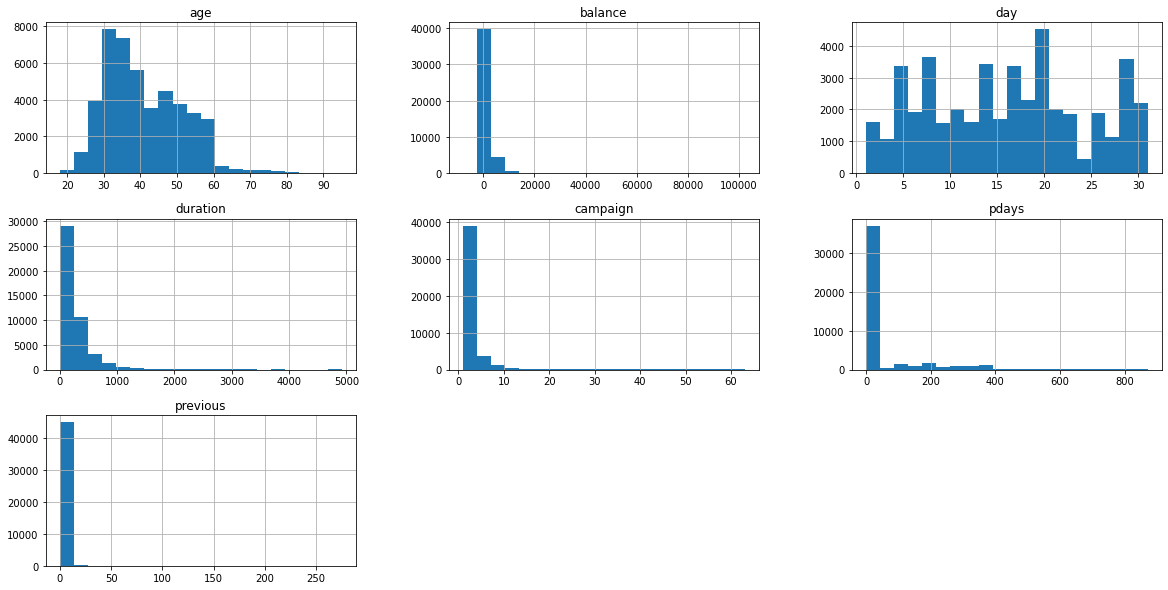

In [ ]:
numerical_value.hist(bins = 20 , figsize= (20,10)) ;

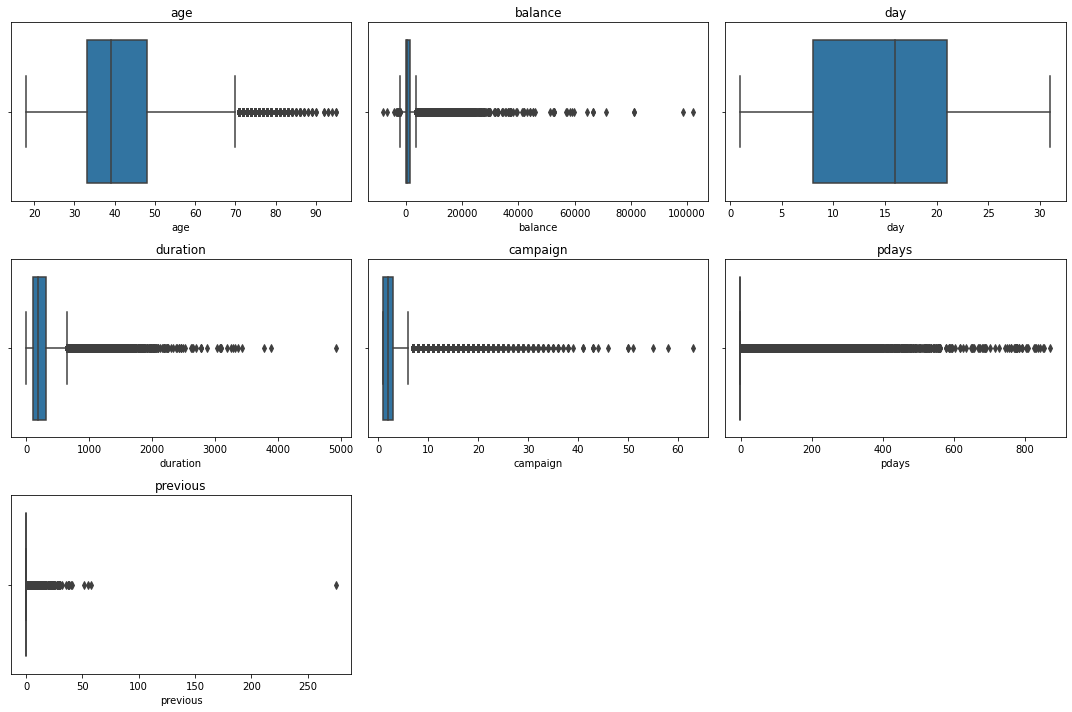

In [ ]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(15,10))

for i in numerical_value:
    plt.subplot(3,3,n)
    n=n+1
    sns.boxplot(data=bank,x=bank[i])
    plt.title(i)
    plt.tight_layout()

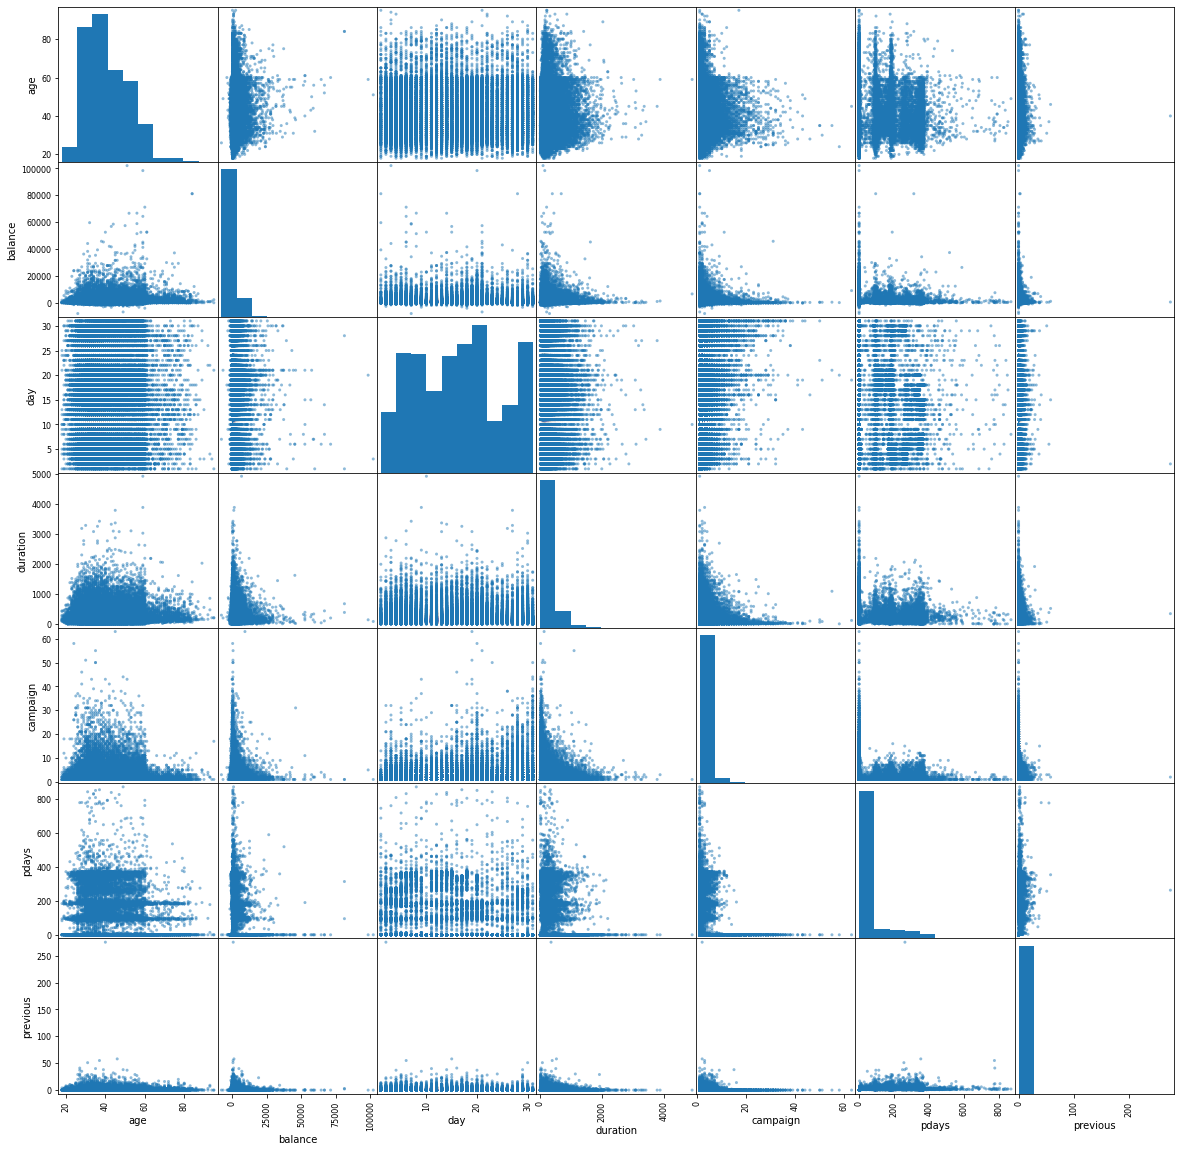

In [ ]:
# plot a scatter matrix of all continuous variables and observe realtionships
pd.plotting.scatter_matrix(numerical_value, figsize=(20,20));

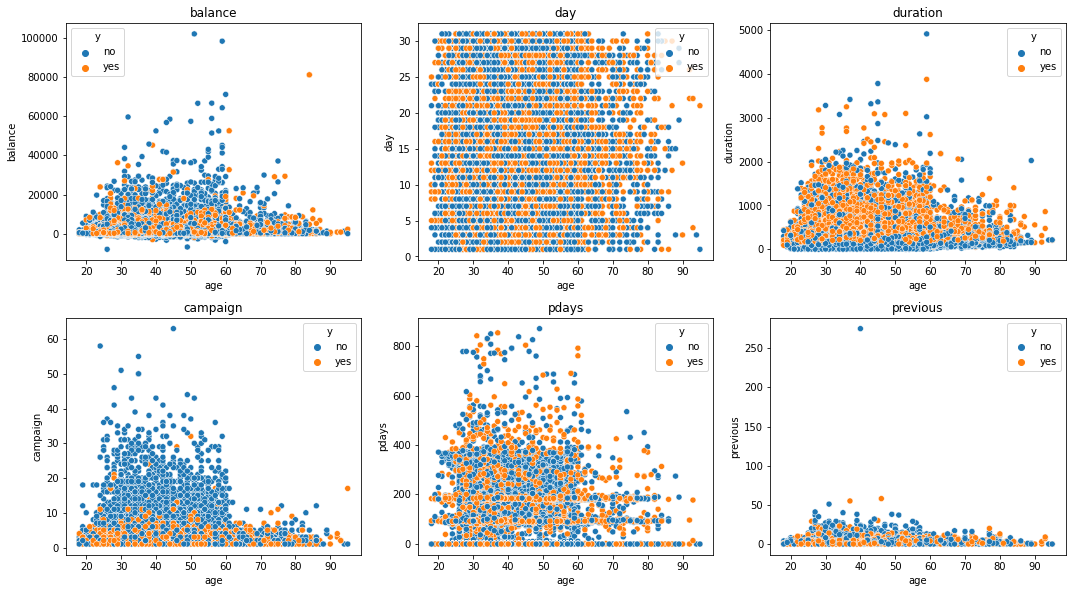

In [ ]:
abc = list(numerical_value.columns.values)
abc.remove('age')
n=1
fig = plt.figure(figsize=(15,12))
for i in abc:
    plt.subplot(3,3,n)
    n=n+1
    #fig = plt.figure(figsize=(8,8))
    sns.scatterplot(x=bank.age, y=bank[i], hue='y', data=bank)
    plt.title(f'Age vs {i} with "yes" values')
    plt.title(i)
    plt.tight_layout()

## Str to float conversion

In [ ]:
bank.y = bank.y.map({'no':0, 'yes':1}).astype('uint8')

In [ ]:
#drop marital and contact columns
bank.drop(['marital'],axis=1, inplace=True)
bank.drop(['contact'],axis=1, inplace=True)
bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


In [ ]:
bank[['default','housing','loan']]=bank[['default','housing','loan']].replace(["yes","no"],["1","0"])
bank['month']=bank['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
bank['job']=bank['job'].replace(['unknown'],['other'])

bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank['job']=le.fit_transform(bank['job'])
bank['education']=le.fit_transform(bank['education'])
bank['poutcome']=le.fit_transform(bank['poutcome'])

bank.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(bank[['age','balance','duration','campaign','pdays','previous']]))
print(z)
bank=bank[(z<3).all(axis=1)]
bank.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 15)

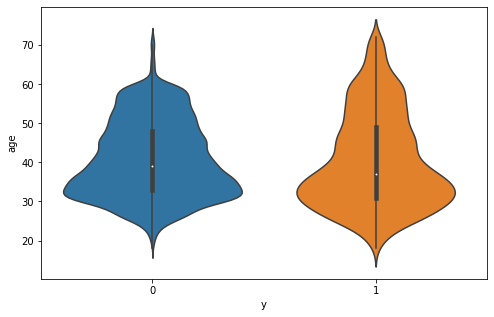

In [ ]:
#violin plot for age
plt.figure(figsize=(8,5))
sns.violinplot(x="y", y="age", data=bank, size=8)
plt.show()

In [ ]:
bank['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

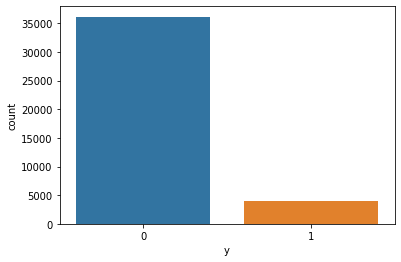

In [ ]:
# count plot for deposit
#the dataset is fairly balanced
sns.countplot(data=bank,x=bank['y'])

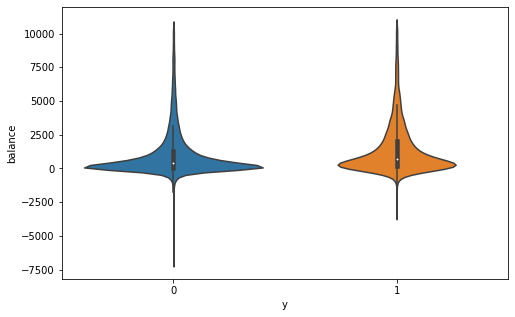

In [ ]:
#violin plot for age
plt.figure(figsize=(8,5))
sns.violinplot(x="y", y="balance", data=bank, size=8)
plt.show()

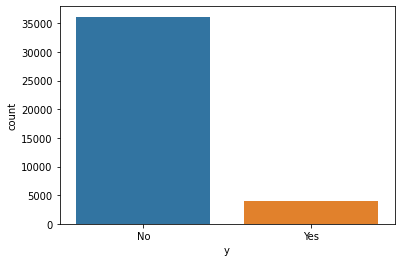

In [ ]:
# visualize the target variable
g = sns.countplot(bank['y'])
g.set_xticklabels(['No','Yes'])
plt.show()

## Train-Test Split

In [ ]:
# Creating the dataset with all independent variables
X = bank.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = bank.iloc[:,-1]

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [ ]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    28912
1     3255
Name: y, dtype: int64

 Distribution of classes of dependent variable in test :
0    7243
1     799
Name: y, dtype: int64


## K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
accuracy_score(y_pred, Y_test)

0.8941805521014673

[[7053  661]
 [ 190  138]]


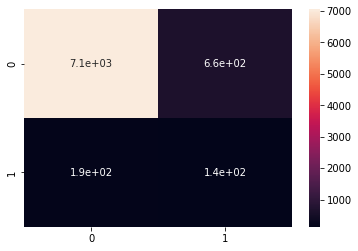

In [ ]:
cm=confusion_matrix(y_pred, Y_test)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
roc_auc_score(y_pred, Y_test)

0.6675216742444842

## Resampling Techniques

In [ ]:
# Class count
class_count_0, class_count_1 = bank['y'].value_counts()

# Separate class
class_0 = bank[bank['y'] == 0]
class_1 = bank[bank['y'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (36155, 15)
class 1: (4054, 15)


## Random Under-Sampling

In [ ]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)

In [ ]:
test_under['y'].value_counts()

0    4054
1    4054
Name: y, dtype: int64

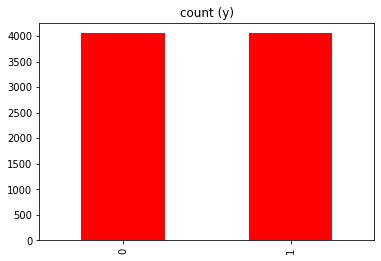

In [ ]:
test_under['y'].value_counts().plot(kind='bar', title='count (y)',color='r')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(bank.iloc[:,0:-1], bank['y'])

print('Original dataset shape:', len(bank))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 40209
Resampled dataset shape 8108


## Random Over-Sampling

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)
test_over = pd.concat([class_1_over, class_0], axis=0)

In [ ]:
test_over['y'].value_counts()

1    36155
0    36155
Name: y, dtype: int64

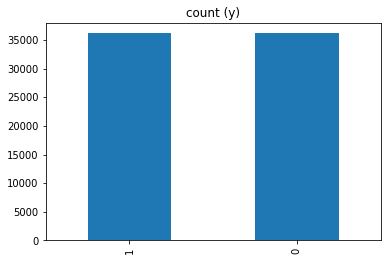

In [ ]:
test_over['y'].value_counts().plot(kind='bar', title='count (y)')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(bank.iloc[:,0:-1], bank['y'])

print('Original dataset shape:', len(bank))
print('Resampled dataset shape', len(y_ros))

Original dataset shape: 40209
Resampled dataset shape 72310


## Under-Sampling: Tomek links

In [ ]:
sm=SMOTETomek(0.75)
x_r,y_r=sm.fit_resample(X,Y)
xtrain,xtest,ytrain,ytest=train_test_split(x_r,y_r,test_size=.20,random_state=0)
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
r_f = RandomForestClassifier()
r_f.fit(xtrain, ytrain)
y_p = r_f.predict(xtest)
a_rf=roc_auc_score(y_p,ytest)
acc_rf=accuracy_score(ytest,y_p)
r_rf=recall_score(ytest,y_p)
p_rf=precision_score(ytest,y_p)
f1_rf=f1_score(ytest,y_p)
print("Score:",a_rf)

(49415, 14) (12354, 14) (49415,) (12354,)
Score: 0.9421183606075889


[[6646  353]
 [ 349 5006]]


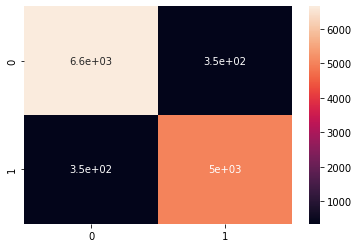

In [ ]:
cm=confusion_matrix(ytest,y_p)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_p,ytest))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6995
           1       0.93      0.93      0.93      5359

    accuracy                           0.94     12354
   macro avg       0.94      0.94      0.94     12354
weighted avg       0.94      0.94      0.94     12354



## Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(bank.iloc[:,0:-1], bank['y'])

print('Original dataset shape', len(bank))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 40209
Resampled dataset shape 72310


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_r,y_r=sm.fit_resample(X,Y)
xtrain,xtest,ytrain,ytest=train_test_split(x_r,y_r,test_size=.20,random_state=0)
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)
r_f = RandomForestClassifier()
r_f.fit(xtrain, ytrain)
y_p = r_f.predict(xtest)
a_rf=roc_auc_score(y_p,ytest)
acc_rf=accuracy_score(ytest,y_p)
r_rf=recall_score(ytest,y_p)
p_rf=precision_score(ytest,y_p)
f1_rf=f1_score(ytest,y_p)
print("Score:",a_rf)

(49471, 14) (12368, 14) (49471,) (12368,)
Score: 0.9403587030538954


[[6666  373]
 [ 348 4981]]


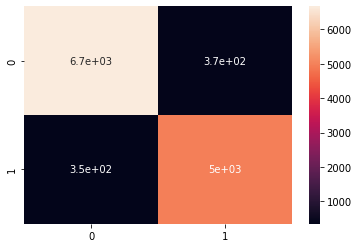

In [ ]:
cm=confusion_matrix(ytest,y_p)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_p,ytest))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7014
           1       0.93      0.93      0.93      5354

    accuracy                           0.94     12368
   macro avg       0.94      0.94      0.94     12368
weighted avg       0.94      0.94      0.94     12368



## Penalize Algorithms (Cost-Sensitive Training)

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, Y_train)

svc_predict = svc_model.predict(X_test)
print('ROCAUC score:',roc_auc_score(Y_test, svc_predict))
print('Accuracy score:',accuracy_score(Y_test, svc_predict))

ROCAUC score: 0.7459110751617763
Accuracy score: 0.7539169360855509


## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
accuracy_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,Y_train,cv=10)
    accuracy_rate.append(score.mean())
print(accuracy_rate)

[0.8614727690425708, 0.8890786296215534, 0.8946122279494663, 0.897006042603272, 0.8975657054330461, 0.8983427979777827, 0.8987781503579398, 0.8983739698306726, 0.8980942447383846, 0.8983429332974543, 0.8977833574588978, 0.8991511976950808, 0.898622726049578, 0.8988403394126662, 0.8993377938563322, 0.899368811058169, 0.8990268195856281, 0.8989957153925741, 0.8989957830524098, 0.8993066703318966]


Text(0, 0.5, 'Accuracy rate')

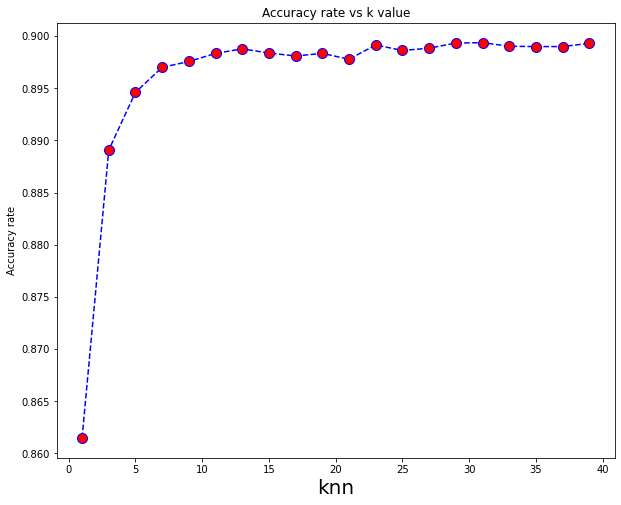

In [ ]:
# plotting accuracy of KNN for every value of K

plt.figure(figsize=(10,8))
plt.plot(range(1,40,2),accuracy_rate,color='b',linestyle='dashed',marker='o',markerfacecolor='r',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('knn',size=20)
plt.ylabel('Accuracy rate')

In [ ]:
# TRaining KNN agaib for best value of K
# Finding Accuracy, AUC, False positive rate, True positive rate, confusion matrix and classificatio report

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
pred=knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)
aucScoreKNN = roc_auc_score(Y_test,  y_pred_prob[:,1])
fprKNN, tprKNN, thresholds = roc_curve(Y_test, y_pred_prob[:,1] )
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[7098  145]
 [ 669  130]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7243
           1       0.47      0.16      0.24       799

    accuracy                           0.90      8042
   macro avg       0.69      0.57      0.59      8042
weighted avg       0.87      0.90      0.88      8042



In [ ]:
print("AUC score for KNN is ",aucScoreKNN)
print("Test Accuracy score for KNN is ",accuracy_score(Y_test, pred))
predT=knn.predict(X_train)
print("Train Accuracy score for KNN is ",accuracy_score(Y_train, predT))

AUC score for KNN is  0.7786238562389096
Test Accuracy score for KNN is  0.898781397662273
Train Accuracy score for KNN is  0.9114620573880063


In [ ]:
# Training KNN for different odd values of K to find maximum Recall

knn = KNeighborsClassifier()
recall_rate=[]
for i in range(1,40,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,Y_train,cv=10,scoring='recall')
    recall_rate.append(score.mean())
print(recall_rate)

[0.2869532798489854, 0.23931382727701744, 0.2107437470504955, 0.19139405379896174, 0.17604247286455874, 0.1677432751297782, 0.15269561113732893, 0.13948466257668712, 0.13335346861727232, 0.1281208117036338, 0.11951580934403021, 0.11920906087777254, 0.10907126002831524, 0.10538084001887682, 0.10477111845210005, 0.09985653610193487, 0.09401321378008495, 0.0887871637564889, 0.08479471448796602, 0.08356866446436999]


Text(0, 0.5, 'Accuracy rate')

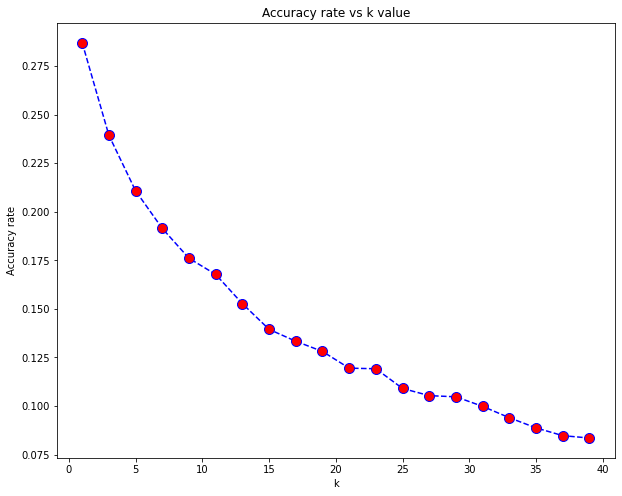

In [ ]:
# plotting recall of values of K

plt.figure(figsize=(10,8))
plt.plot(range(1,40,2),recall_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Accuracy rate vs k value')
plt.xlabel('k')
plt.ylabel('Accuracy rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
print("Test Recall score for KNN is ",recall_score(Y_test, pred))
predT=knn.predict(X_train)
print("Train Recall score for KNN is ",recall_score(Y_train, predT))
#print("Best parameters for KNN are ",knn.best_params_)

Test Recall score for KNN is  0.21777221526908636
Train Recall score for KNN is  0.44516129032258067


##Naive Bayes
 

In [ ]:
# Training Naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
pred = gnb.predict(X_test)
accuracy_NB = accuracy_score(Y_test, pred)
y_pred_prob = gnb.predict_proba(X_test)
auc_Score_NB = roc_auc_score(Y_test, y_pred_prob[:,1])
fpr_NB, tpr_NB, thresholds = roc_curve(Y_test, y_pred_prob[:,1])

[[6465  778]
 [ 467  332]]


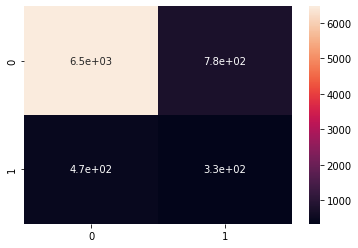

In [ ]:
cm = confusion_matrix(Y_test, pred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7243
           1       0.30      0.42      0.35       799

    accuracy                           0.85      8042
   macro avg       0.62      0.65      0.63      8042
weighted avg       0.87      0.85      0.86      8042



In [ ]:
print('AUC Score for NB is: ',auc_Score_NB)
print('Test Accuracy score for NB is: ',accuracy_score(Y_test, pred))
predT = gnb.predict(X_train)
print('Train Accuracy score for NB is: ',accuracy_score(Y_train, predT))
print('Recall score for NB is: ',recall_score(Y_test, pred))

AUC Score for NB is:  0.8153549316184096
Test Accuracy score for NB is:  0.8451877642377518
Train Accuracy score for NB is:  0.8441570553673019
Recall score for NB is:  0.41551939924906134
